##  Problem statement.

Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to
the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity
can lead to increased price fluctuations and market instability.


In this project, you are required to build a machine learning model to predict cryptocurrency liquidity levels
based on various market factors such as trading volume, transaction patterns, exchange listings, and social
media activity. The objective is to detect liquidity crises early to help traders and exchange platforms
manage risks effectively.


Your final model should provide insights into market stability by forecasting liquidity variations, allowing
traders and financial institutions to make informed decisions.

## 1. Data Collection

You will use a dataset that includes historical cryptocurrency price and trading volume data from below link.
The dataset consists of records from 2016 and 2017.

Dataset : - https://drive.google.com/drive/folders/10BRgPip2Zj_56is3DilJCowjfyT6E9AM

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


**Import the CSV Data as Pandas DataFrame**

In [4]:
# Load the CSV files

df_1 = pd.read_csv("coin_gecko_2022-03-16.csv")
df_2 = pd.read_csv("coin_gecko_2022-03-17.csv")


In [5]:
# Join (concatenate) the dataframes vertically
combined_df = pd.concat([df_1, df_2], ignore_index=True)

# Save the result to a new CSV
combined_df.to_csv('combined_coin_gecko.csv', index=False)

In [6]:
df = combined_df

In [7]:
df.head() # Show Top 5 Records

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [9]:
df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [10]:
# Display summary statistics for a dataframe
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11


In [11]:
df.shape # shap of dataset

(1000, 9)

In [12]:
df.isnull().sum() # check for null (missing) values

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

## . EXPLORING DATA


**Let's convert the datetime column to pandas datetime format**


In [13]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df["date"]

0     2022-03-16
1     2022-03-16
2     2022-03-16
3     2022-03-16
4     2022-03-16
         ...    
995   2022-03-17
996   2022-03-17
997   2022-03-17
998   2022-03-17
999   2022-03-17
Name: date, Length: 1000, dtype: datetime64[ns]

In [14]:
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

In [15]:
# define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']

We have 2 categorical features : ['coin', 'symbol']


### Feature Information

- **numerical features**

    - **price :** The current market price of one unit of the cryptocurrency in USD (or another base currency).
    - **1h :** The	Percentage price change over the last 1 hour. Positive values mean the price went up, negative values mean it went down.
    - **24h :** The	Percentage price change over the last 24 hours.
    - **7d :** The	Percentage price change over the last 7 days.
    - **24h_volume :** The	Total traded volume (in USD or equivalent) over the last 24 hours. A measure of how much trading activity there was.
    - **mkt_cap :** The	Market capitalization — the total market value of all coins currently in circulation. Typically price × circulating supply.

- **categorical features**

    - **date :** The	The date when the data was recorded or captured.
    - **coin :** The	The name of the cryptocurrency (e.g., Bitcoin, Ethereum).
    - **symbol :** The ticker symbol or shorthand for the coin (e.g., BTC, ETH).

In [16]:
# proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

coin
Bitcoin         0.2
Prometeus       0.2
Bezoge Earth    0.2
flexUSD         0.2
Hxro            0.2
               ... 
Kin             0.1
EverRise        0.1
OpenDAO         0.1
ThunderCore     0.1
Verus Coin      0.1
Name: proportion, Length: 506, dtype: float64
---------------------------
symbol
TIME     0.4
RUNE     0.4
FEG      0.4
BTC      0.2
STARL    0.2
        ... 
RISE     0.1
TREEB    0.1
SOS      0.1
TT       0.1
VRSC     0.1
Name: proportion, Length: 503, dtype: float64
---------------------------


### Numerical Features


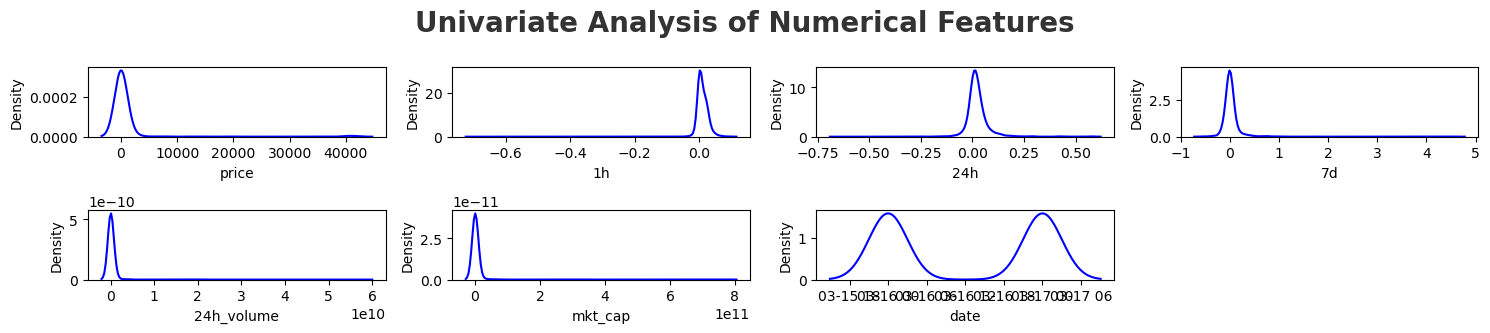

In [17]:

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

*Report of the univariate analytis*
1. `price` is left-skewed, most of the values falls in 0 to 10000 range and has outliers.
2. `1h` is right-skewed, most of the values falls in -0.1 to 1.0  range and has outliers.
3. `24h` are following a normal distribution
4. `7d ` has constant values. Most of the values seems to be -1 or 1 .
5. `24h_volume , mkt_cap `  is lift-skewed, most of the values falls in -0.1 to 1.0  range and has outliers.
6. ` data `  has constant values. Most of the values seems to be 2016 or 2017 .

## categorical columns


In [18]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [19]:
df['symbol'].unique()


array(['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'XRP', 'LUNA', 'SOL', 'ADA',
       'DOT', 'AVAX', 'BUSD', 'DOGE', 'UST', 'SHIB', 'WBTC', 'CRO',
       'MATIC', 'DAI', 'ATOM', 'LTC', 'STETH', 'NEAR', 'LINK', 'TRX',
       'FTT', 'BCH', 'LEO', 'OKB', 'ALGO', 'XLM', 'UNI', 'HBAR', 'AXS',
       'MANA', 'ETC', 'EGLD', 'SAND', 'ICP', 'XMR', 'CETH', 'VET', 'FTM',
       'FIL', 'OSMO', 'KLAY', 'FRAX', 'WAVES', 'THETA', 'MIM', 'GRT',
       'XTZ', 'CUSDC', 'HNT', 'RUNE', 'EOS', 'OMI', 'MIOTA', 'CDAI',
       'FLOW', 'TFUEL', 'AAVE', 'ZEC', 'MKR', 'JUNO', 'GALA', 'BTT', 'AR',
       'HBTC', 'CAKE', 'QNT', 'ONE', 'XEC', 'BSV', 'NEO', 'TUSD', 'HT',
       'KCS', 'CEL', 'STX', 'HEART', 'ENJ', 'BAT', 'NEXO', 'AMP', 'XRD',
       'KSM', 'CELO', 'KDA', 'CHZ', 'DASH', 'FXS', 'USDP', 'BIT', 'GT',
       'CVX', 'SNX', 'XIDO', 'LRC', 'XEM', 'ANC', 'ROSE', 'CRV', 'DCR',
       'CUSDT', 'SCRT', 'LN', 'MINA', 'HOT', 'COMP', 'IOTX', 'KUB',
       'USDN', 'YFI', 'NXM', 'XDC', '1INCH', 'WAXP', 'SLP', 'QTUM',
    

In [20]:
df["coin"].nunique()

506

<Axes: xlabel='date', ylabel='price'>

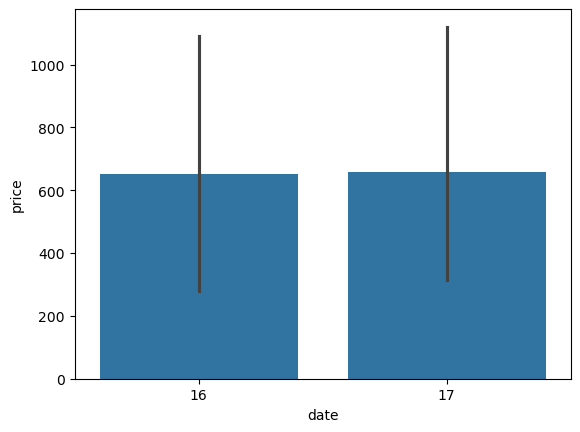

In [21]:
sns.barplot(data = df, x = df.date.dt.day, y =  df.price	)

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

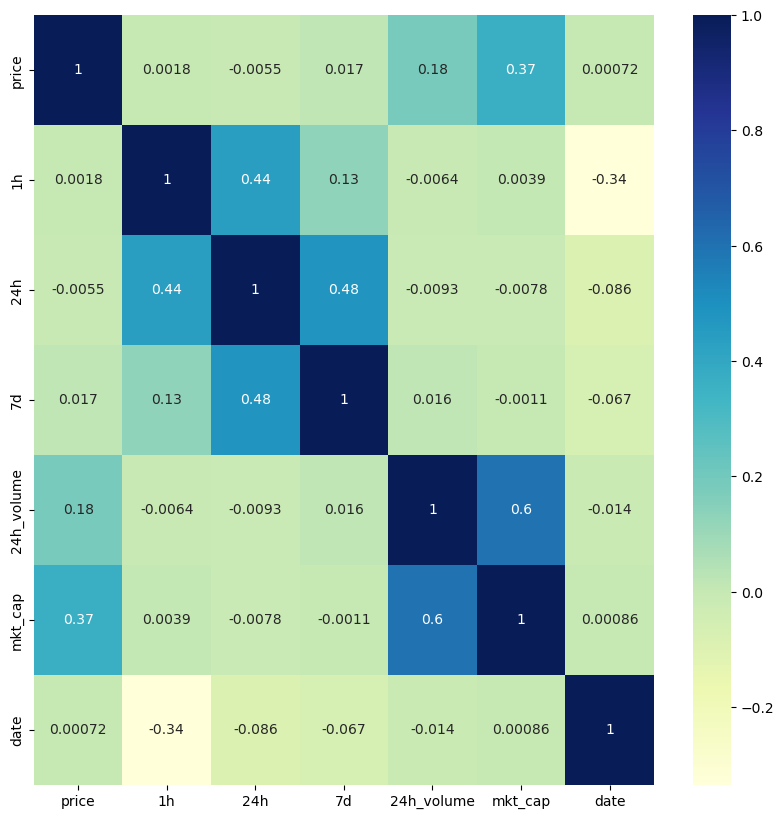

In [22]:
plt.figure(figsize = (10,10))
num_features = numeric_features.copy()

sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

**let's check the correlation in vif now**     
    
**We can see that 1h , 24h , 7d , 24h_volume does has some null values. Let's first input those values**

In [23]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
997,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


In [24]:
#let's fill null values 

df["1h"].fillna(df["1h"].median(), inplace=True)
df["24h"].fillna(df["24h"].median(), inplace=True)
df["7d"].fillna(df["7d"].median(), inplace=True)
